# 第09章 绘图和可视化

## 9.1 matplotlib API入门

In [82]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

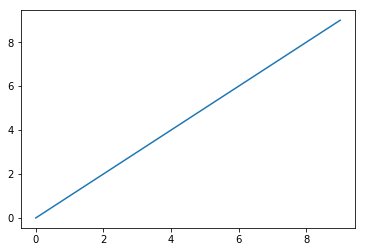

In [3]:
plt.plot(data)

### Figure和Subplot

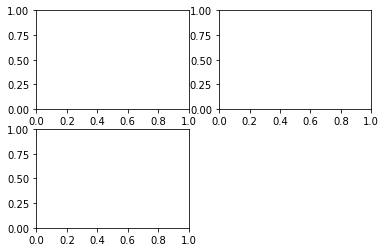

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

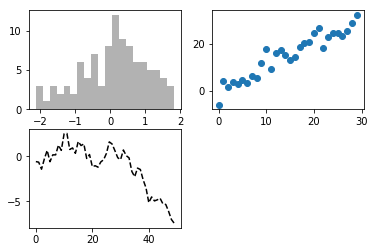

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins = 20, color = 'k',alpha = 0.3)
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000007226080>,
      dtype=object)

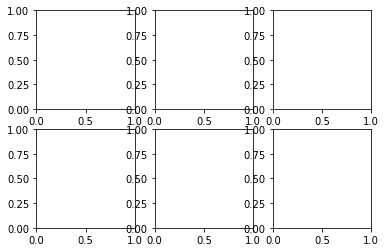

In [20]:
fig,axes = plt.subplots(2,3)
#plt.subplots_adjust(wspace = 0,hspace = 0)
axes

### 调整subplot周围的间距

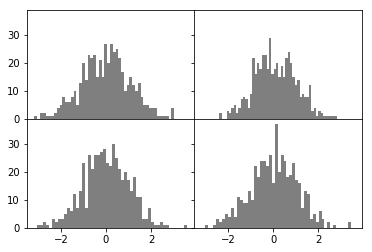

In [13]:
#subplots_adjust(left = None,bottom = None,right = None,top = None,wspace = None,hspace = None)
fig,axes = plt.subplots(2,2,sharex = True,sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins = 50,color ='k',alpha = 0.5)
        plt.subplots_adjust(wspace = 0,hspace = 0)

### 颜色、标记和线型

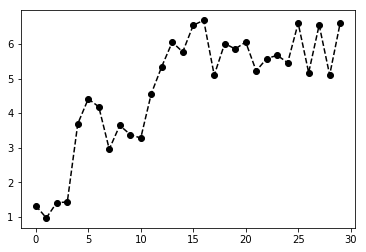

In [21]:
#ax.plot(x, y, 'g--')
#ax.plot(x, y, linestyle='--', color='g')
from numpy.random import randn
plt.plot(randn(30).cumsum(),'ko--')

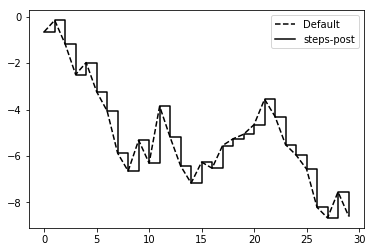

In [27]:
#plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
data = np.random.randn(30).cumsum()
plt.plot(data,'k--',label = 'Default')
plt.plot(data,'k-',drawstyle = 'steps-post',label = 'steps-post')
plt.legend(loc = 'best')

### 刻度、标签和图例

### 设置标题、轴标签、刻度以及刻度标签

Text(0.5, 0, 'Stages')

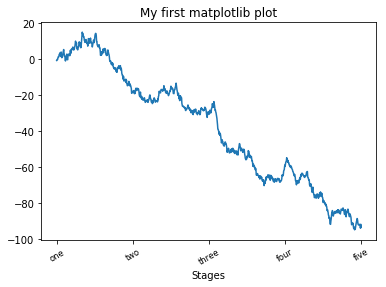

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation = 30,fontsize = 'small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

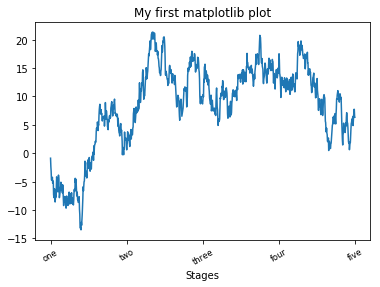

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],rotation = 30,fontsize = 'small')
props = {'title':'My first matplotlib plot','xlabel':'Stages'}
ax.set(**props)

### 添加图例

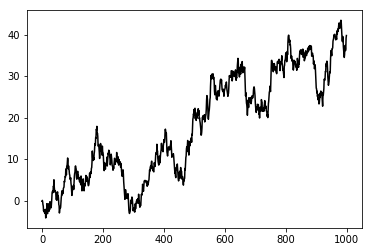

In [33]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label = 'one')

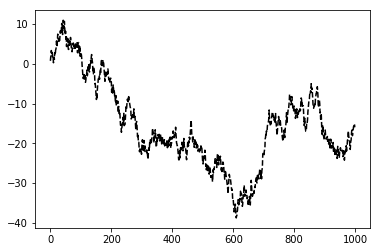

In [35]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k--',label = 'two')

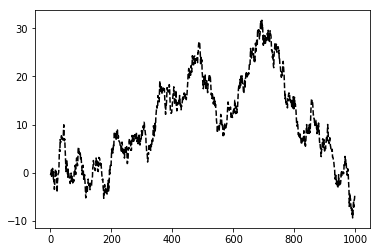

In [36]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k--',label = 'two')

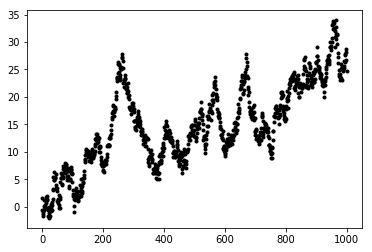

In [37]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k.',label = 'three')

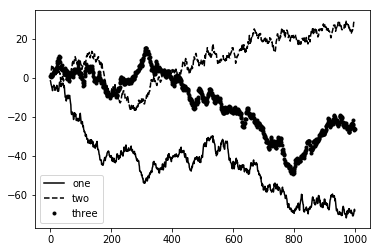

In [38]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k',label = 'one')
ax.plot(randn(1000).cumsum(),'k--',label = 'two')
ax.plot(randn(1000).cumsum(),'k.',label = 'three')
ax.legend(loc = 'best')

### 注解以及在Subplot上绘图

ValueError: not enough values to unpack (expected 2, got 1)

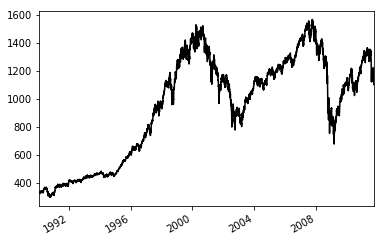

In [42]:
#ax.text(x,y,'Hello world',family = 'monospace',fontsize = 10)
import pandas as pd
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('spx.csv',index_col = 0,parse_dates = True)
spx = data['SPX']
spx.plot(ax = ax,style = 'k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
crisis_data = [(datetime(2007,10,11),)]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

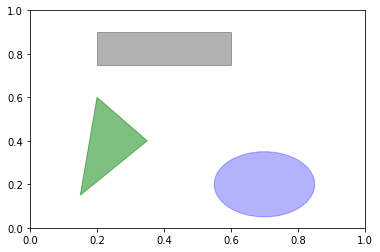

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件

In [44]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [45]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [46]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### matplotlib配置

In [48]:
#plt.rc('figure', figsize=(10, 10))
#font_options = {'family' : 'monospace',
#                'weight' : 'bold',
#                'size'   : 'small'}
#plt.rc('font', **font_options)

## 9.2 使用pandas和seaborn绘图

### 线型图

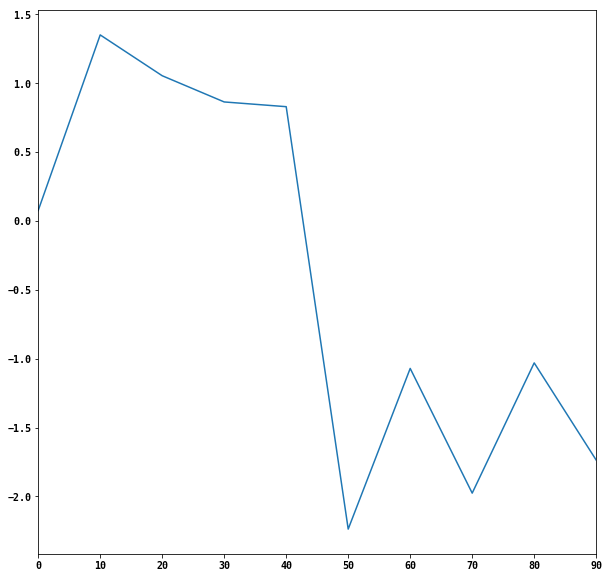

In [50]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

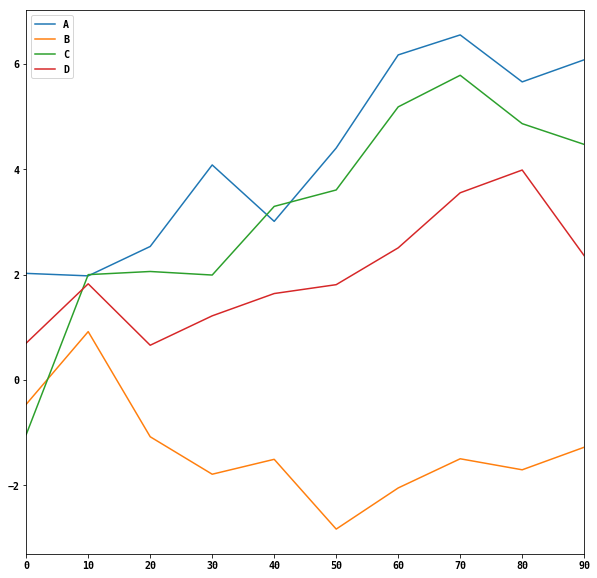

In [51]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

### 柱状图

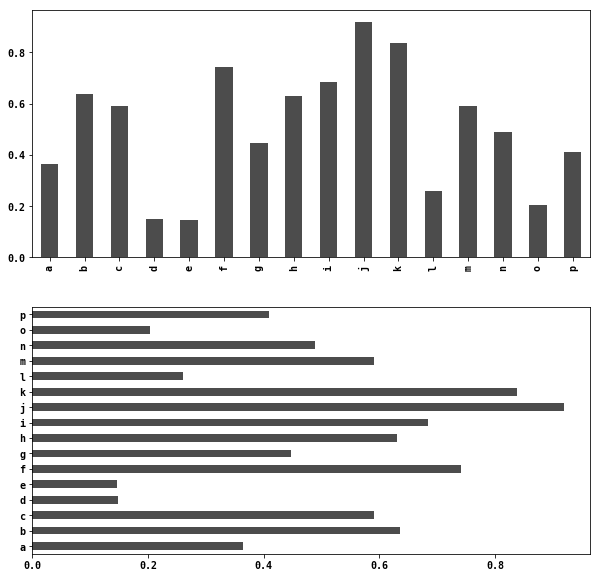

In [54]:
fig,axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16),index = list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0],color = 'k',alpha = 0.7)
data.plot.barh(ax = axes[1],color = 'k',alpha = 0.7)

In [55]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.474535,0.865648,0.988975,0.734236
two,0.291131,0.861507,0.277239,0.192406
three,0.106214,0.673537,0.246541,0.388721
four,0.296762,0.360610,0.182729,0.236903
five,0.267096,0.147895,0.492160,0.348055
six,0.870647,0.816301,0.983964,0.242587


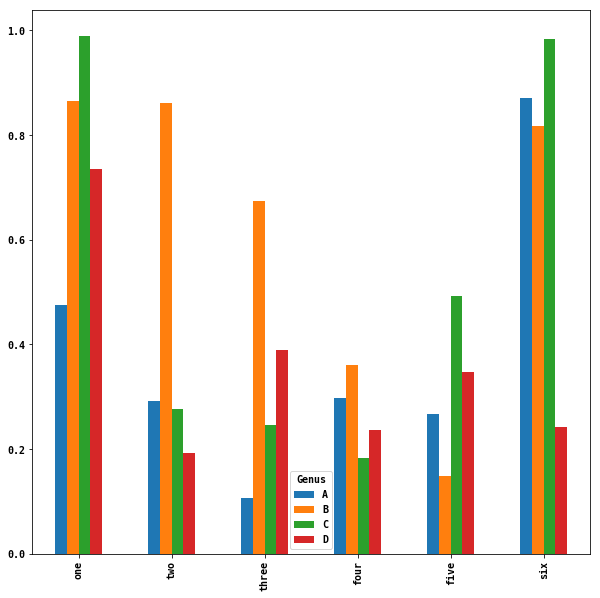

In [56]:
df.plot.bar()

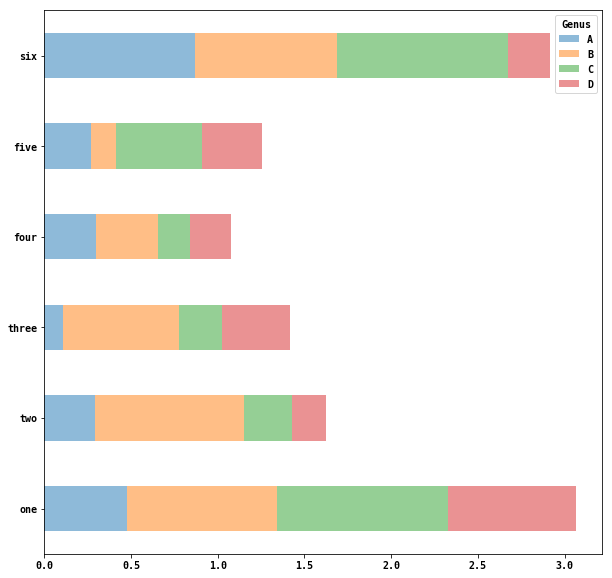

In [58]:
df.plot.barh(stacked = True,alpha = 0.5)

In [59]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [60]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:,2:5]

In [61]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


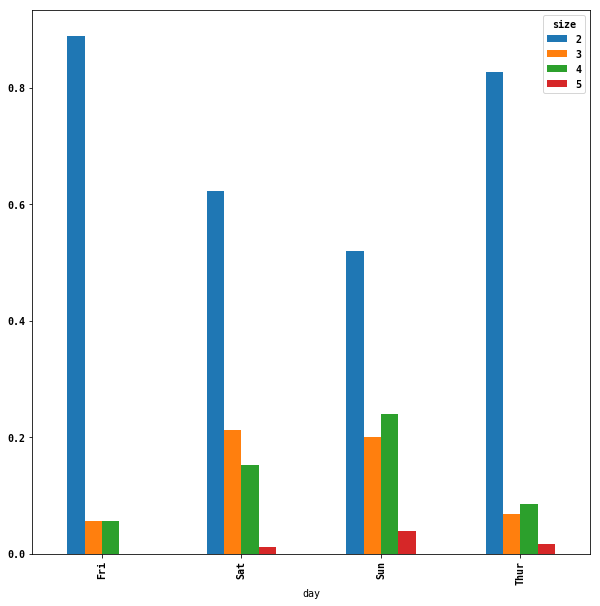

In [62]:
party_pcts.plot.bar()

In [63]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


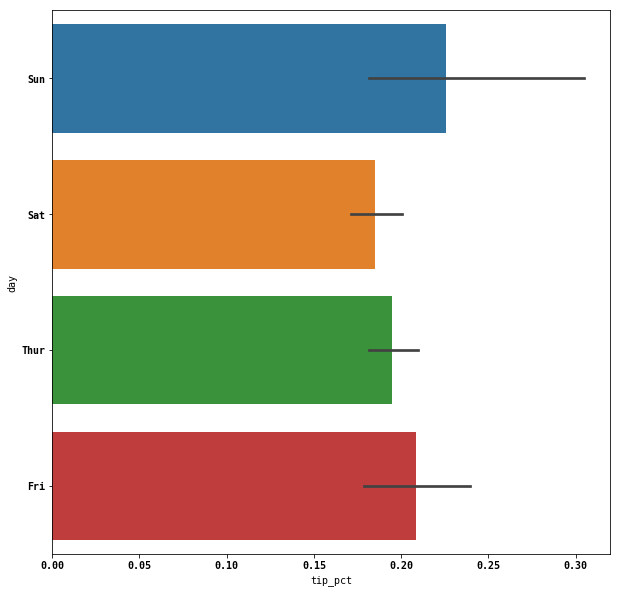

In [64]:
sns.barplot(x = 'tip_pct',y = 'day',data = tips,orient = 'h')

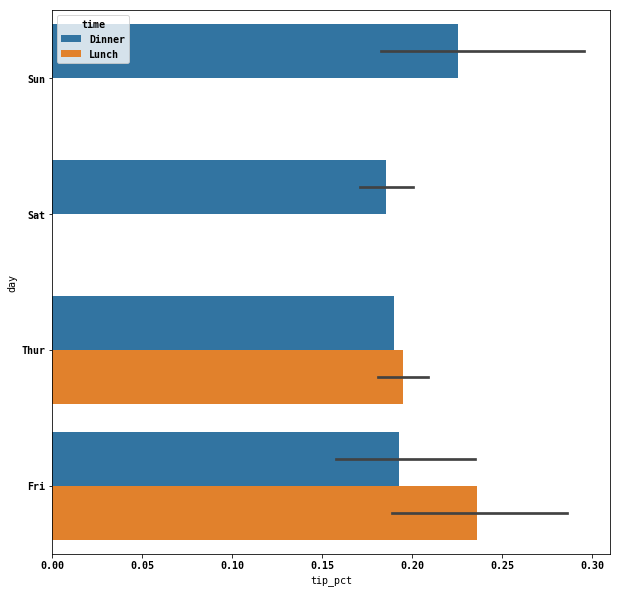

In [65]:
sns.barplot(x = 'tip_pct',y = 'day',hue = 'time',data = tips,orient = 'h')

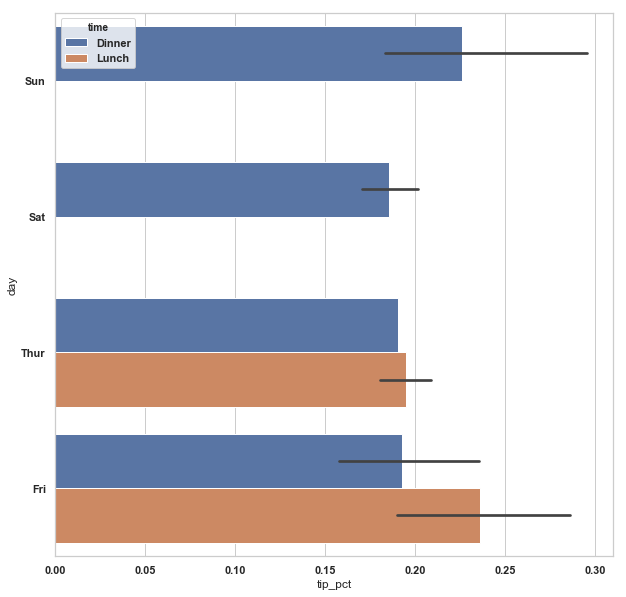

In [67]:
sns.set(style = 'whitegrid')
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 直方图和密度图

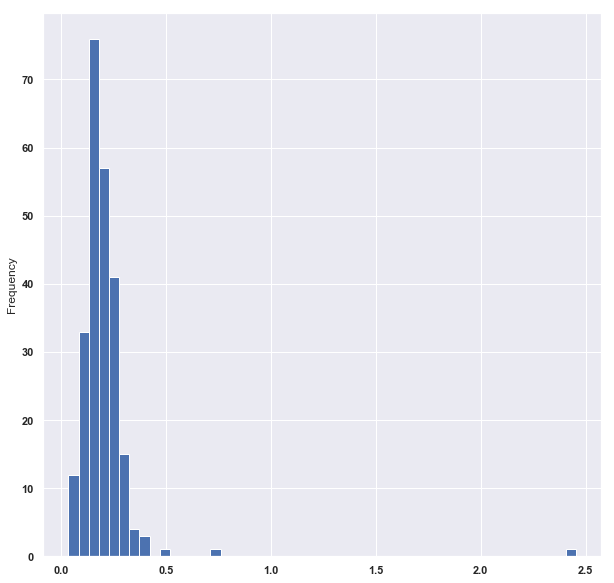

In [76]:
sns.set()
tips['tip_pct'].plot.hist(bins=50)

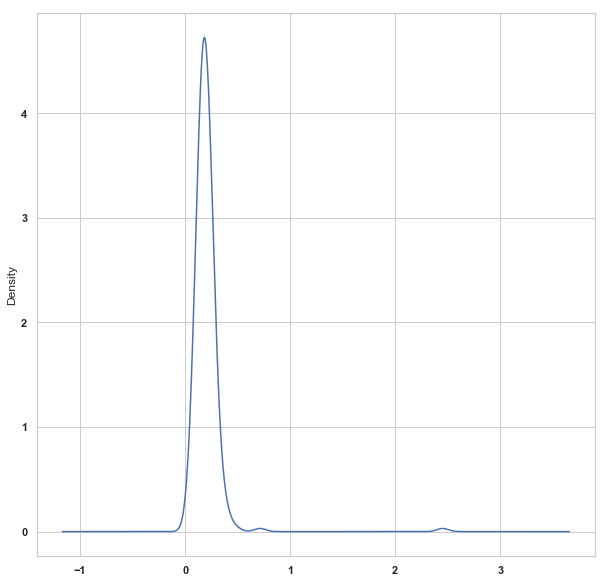

In [69]:
tips['tip_pct'].plot.density()

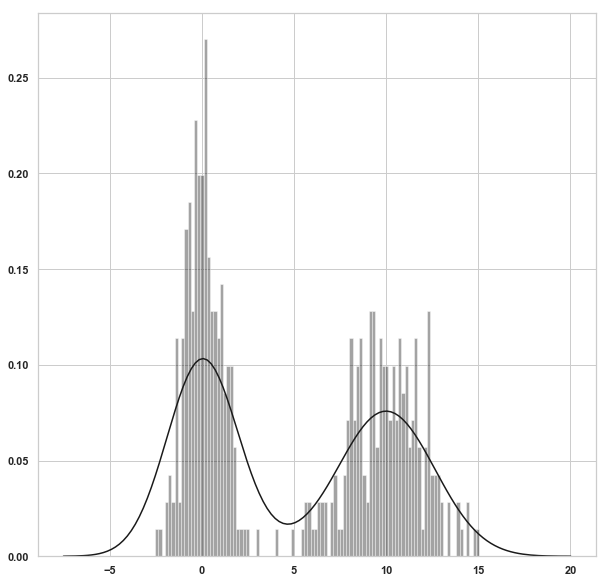

In [71]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散布图或点图

In [78]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

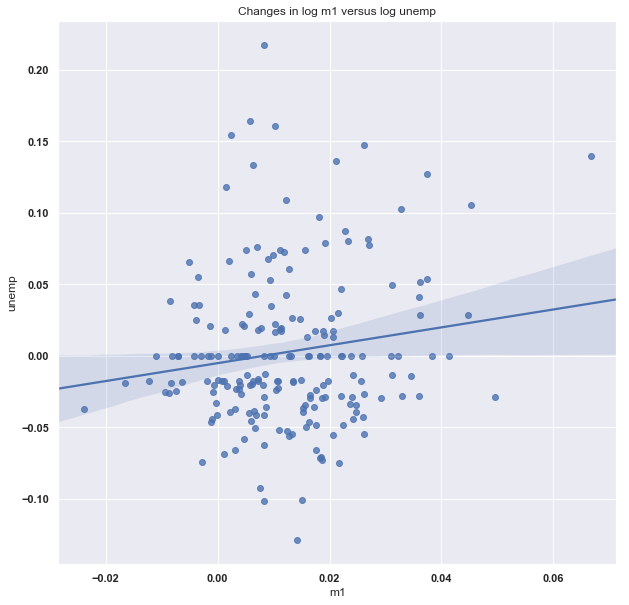

In [79]:
sns.regplot('m1','unemp',data = trans_data)
plt.title('Changes in log %s versus log %s'%('m1','unemp'))

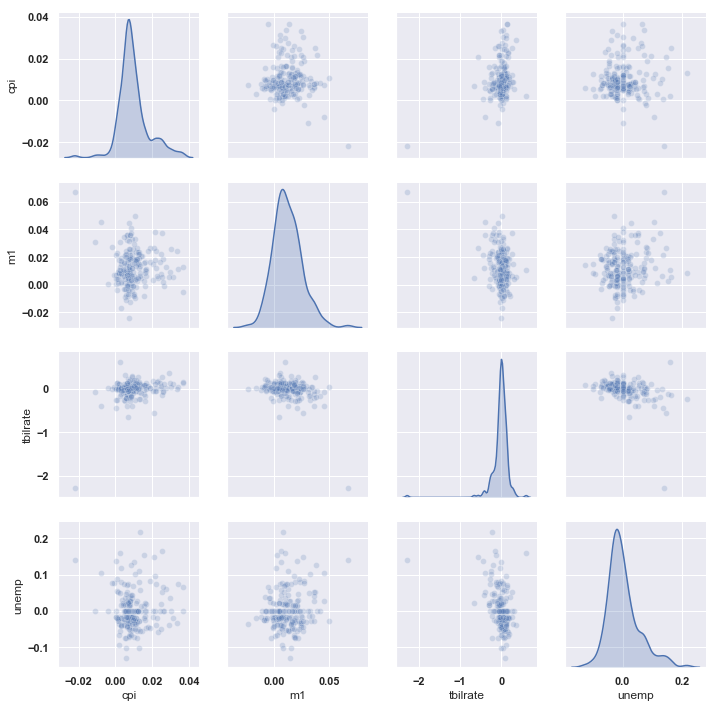

In [80]:
sns.pairplot(trans_data,diag_kind = 'kde',plot_kws = {'alpha':0.2})

### 分面网格（facet grid）和类型数据

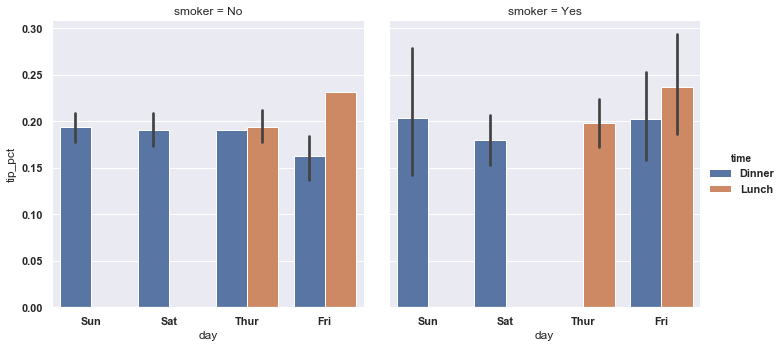

In [83]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

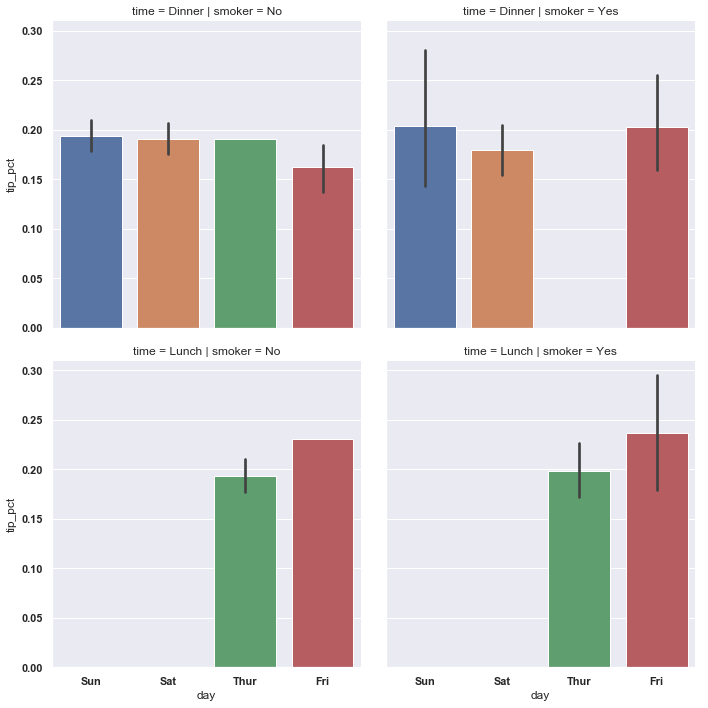

In [84]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

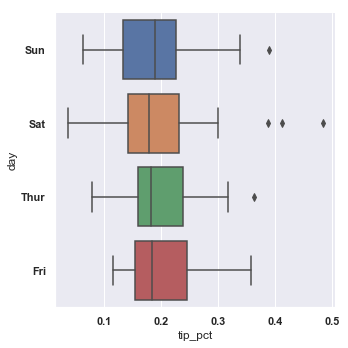

In [85]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## 9.3 其它的Python可视化工具

## 9.4 总结